<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 11**

## **Contenido**

- <a href="#gro"> GroupBy</a><br>
  - <a href="#esp"> Especificando la clave para la división del DataFrame </a><br>
  - <a href="#mul"> Objetos de múltiples índices</a><br>
  - <a href="#tab"> Tablas dinámicas</a><br>
- <a href="#vis"> Visualización: Seaborn </a><br>

<p><a name="esp"></a></p>


# **Especificando la clave para la división del DataFrame**

Los ejemplos presentados anteriormente expresan solo unas de las muchas opciones mediante las cuales se pueden definir los grupos. Veamos algunas otras opciones para la especificación de grupos.



La clave puede ser cualquier serie o lista con una longitud que coincida con la del DataFrame

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
np.random.seed(42)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   "data1": range(1,7), "data2": np.random.randint(0,10,6)}, columns= ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,1,6
1,B,2,3
2,C,3,7
3,A,4,4
4,B,5,6
5,C,6,9


Vamos a agrupar las filas 0 y 2 con índice "a"; las 1 y 3 con índice 1 ; las 4 y 5 con índice 10 y obtener la media

In [ ]:
l = ['a', 1, 'a', 1, 10.0, 10.0]
df.groupby(l).mean()

,data1,data2
1,3.0,3.5
10.0,5.5,7.5
a,2.0,6.5


Otro método es el de proporcionar un diccionario que asigne los valores de los índices a las claves de grupo

In [ ]:
df2 = df.copy().set_index('key')
df2

,data1,data2
key,,
A,1,6
B,2,3
C,3,7
A,4,4
B,5,6
C,6,9


In [ ]:
mappeo = {"A": 'vocal', "B":'consonante', "C": 'consonante'}
df2.groupby(mappeo).sum()

,data1,data2
consonante,16,25
vocal,5,10


In [ ]:
df2

,data1,data2
key,,
A,1,6
B,2,3
C,3,7
A,4,4
B,5,6
C,6,9


In [ ]:
df.groupby(df.key.map(mappeo)).sum()

,data1,data2
key,,
consonante,16,25
vocal,5,10


Análogamente al mapeo, es posible pasar cualquier función de Python que aplique sobre el índice y genere el grupo

In [ ]:
df2.index

Index(['A', 'B', 'C', 'A', 'B', 'C'], dtype='object', name='key')

In [ ]:
type(df2.index.str.lower())

pandas.core.indexes.base.Index

In [ ]:
df2.index.str.lower()

Index(['a', 'b', 'c', 'a', 'b', 'c'], dtype='object', name='key')

In [ ]:
df2.groupby(str.lower).mean()

,data1,data2
a,2.5,5.0
b,3.5,4.5
c,4.5,8.0


<p><a name="mul"></a></p>

# **Objetos de múltiples índices**

Hasta este punto, nos hemos centrado principalmente en datos unidimensionales y bidimensionales, almacenados en Series y DataFrame, respectivamente. A menudo, es útil ir más allá y almacenar datos de mayor dimensión, es decir, datos indexados por más de una o dos claves.


Por ejemplo, cualquiera de las opciones anteriores de agrupamiento se pueden combinar para agrupar con índice múltiple

In [ ]:
df = df2.copy().groupby([str.lower, mappeo]).mean()
df

,,data1,data2
a,vocal,2.5,5.0
b,consonante,3.5,4.5
c,consonante,4.5,8.0


Note que en este caso obtenemos un objeto con dos índices o niveles

In [ ]:
df.index

MultiIndex([('a',      'vocal'),
            ('b', 'consonante'),
            ('c', 'consonante')],
           )

Se puede acceder a los diferentes niveles del índice múltiple mediante el kwarg `level`:

In [ ]:
df.groupby(level= 0).mean()

,data1,data2
a,2.5,5.0
b,3.5,4.5
c,4.5,8.0


In [ ]:
df.groupby(level= 1).mean()

,data1,data2
consonante,4.0,6.25
vocal,2.5,5.00


Estudiemos este tipo de estructuras con un conjunto de datos real:

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.columns = titanic.columns.str.lower()
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Veamos, por ejemplo, la tasa de supervivencia por género y por clase:

In [ ]:
titanic.groupby(['sex', 'pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [ ]:
titanic.groupby(['sex', 'pclass'])[['survived']].mean()

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Incluyamos ahora otra agregación:

In [ ]:
df = titanic.groupby(['sex', 'pclass']).survived.agg([np.mean, len])
df.len.sum()

891

In [ ]:
titanic.shape[0]

891

si quisieramos obtener el número de personas que sobrevivieron podremos, por ejemplo, realizar una operación vectorizada que, como ya vimos, preserva el índice:

In [ ]:
df['len'] * df['mean']

sex     pclass
female  1         91.0
        2         70.0
        3         72.0
male    1         45.0
        2         17.0
        3         47.0
dtype: float64

Con estos objetos de índice múltiple, los datos de dimensiones superiores se pueden representar de forma compacta dentro de los objetos DataFrame bidimensionales y Series unidimensionales familiares.


<p><a name="tab"></a></p>

# **Tablas dinámicas**

Volvamos a obtener la tasa de supervivencia por género y por clase

In [ ]:
df = titanic.groupby(['sex', 'pclass']).survived.mean()
df

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

siempre podremos representar esta información en un DataFrame con índice único mediante el método `unstack()`:

In [ ]:
df.unstack()

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Este GroupBy bidimensional es lo suficientemente común como para que Pandas incluya una función conveniente `pivot_table` que maneja este tipo de agregación multidimensional:

In [ ]:
titanic.pivot_table('survived', index= 'sex', columns= 'pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Por defecto `pivot_table` aplica la función `mean()`. Para cambiar la función de agregación utilizamos el argumento `aggfunc`

In [ ]:
titanic.pivot_table('survived', index= 'sex', columns= 'pclass', aggfunc= "sum")

pclass,1,2,3
sex,,,
female,91,70,72
male,45,17,47


Podemos agrupar por dos columnas y aplicar una función correspondiente a cada una mediante un mapeo:

In [ ]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
titanic.pivot_table( index= 'sex', columns= 'pclass', aggfunc= {"survived":"sum", 'fare':'mean'})

fare                       survived        
pclass           1          2          3        1   2   3
sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

La agrupación en tablas dinámicas se puede especificar con múltiples niveles. Podríamos estar interesados en ver la edad como una tercera dimensión. Seccionaremos la edad usando la función `pd.cut`

In [ ]:
titanic.age.min(), titanic.age.max()

(0.42, 80.0)

In [ ]:
pd.cut(titanic.age, [0,18,80], labels= ['Menor', 'Mayor'])

0      Mayor
1      Mayor
2      Mayor
3      Mayor
4      Mayor
       ...  
886    Mayor
887    Mayor
888      NaN
889    Mayor
890    Mayor
Name: age, Length: 891, dtype: category
Categories (2, object): ['Menor' < 'Mayor']

Podemos aplicar esta misma estrategia para trabajar con las columnas. Agreguemos información sobre la tarifa pagada usando `pd.cut` para calcular automáticamente los cuantiles

In [ ]:
edad = pd.cut(titanic.age, [0,18,80], labels= ['Menor', 'Mayor'])

titanic.pivot_table('survived', ['sex', edad], columns='pclass', aggfunc='sum')

pclass         1   2   3
sex    age              
female Menor  10  14  22
       Mayor  72  54  25
male   Menor   4   9  11
       Mayor  36   6  27

A veces es útil calcular totales a lo largo de cada grupo. Esto se puede hacer a través del kwarg `margins`

In [ ]:
titanic.pivot_table('survived', 'sex', columns='pclass', aggfunc='sum', margins = True)

pclass,1,2,3,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


<p><a name="vis"></a></p>

# **Visualización: Seaborn**

[Seaborn](https://seaborn.pydata.org/) proporciona una API, además de Matplotlib, que ofrece múltiples opciones para el estilo de gráficos. Define funciones simples de alto nivel para tipos de gráficos estadísticos comunes y se integra de manera adecuada con los objetos de Pandas.


In [ ]:
import seaborn as sns
sns.set()

In [ ]:
nba = pd.read_csv('https://raw.githubusercontent.com/tomasate/Diplomado_ML/main/datasets/data/nivel_1/Data/nba.csv', 
                  index_col= 'Unnamed: 0')
nba.dropna(inplace = True)
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


Respondamos a las siguientes preguntas:

* ¿Cuáles son los cinco equipos que pagan los salarios mas altos? (sumando toda la nómina de sus jugadores). 

In [ ]:
team_salary = nba.groupby('Team', as_index= False)['Salary'].sum().sort_values(by ='Salary', ascending = False)[:5]
team_salary

,Team,Salary
12,Los Angeles Clippers,93906914.0
20,Oklahoma City Thunder,81515298.0
9,Golden State Warriors,80535517.0
5,Cleveland Cavaliers,74068189.0
4,Chicago Bulls,73265800.0


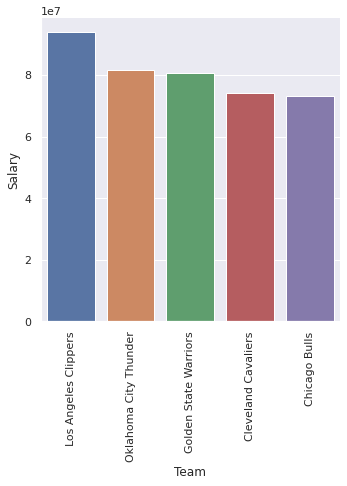

In [ ]:
sns.catplot(x = "Team", y = 'Salary', kind= 'bar', data= team_salary)
plt.xticks(rotation = 90);

* Separe la variable *Age* en tres grupos y cree una nueva columna llamada *Age_Group* con esta información. Muestre un gráfico de barras con el número de jugadores por grupo de edad diferenciando en esta (mediante un código de color) la posición.

In [ ]:
nba.Age

0      25.0
1      25.0
3      22.0
6      21.0
7      25.0
       ... 
449    23.0
451    26.0
452    20.0
453    26.0
456    26.0
Name: Age, Length: 364, dtype: float64

In [ ]:
pd.cut(nba.Age, 3, labels=['baja', 'media', 'alta'])

0      baja
1      baja
3      baja
6      baja
7      baja
       ... 
449    baja
451    baja
452    baja
453    baja
456    baja
Name: Age, Length: 364, dtype: category
Categories (3, object): ['baja' < 'media' < 'alta']

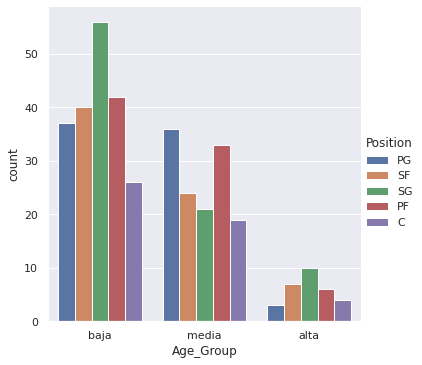

In [ ]:
nba['Age_Group'] = pd.cut(nba.Age, 3, labels=['baja', 'media', 'alta'])

sns.catplot(data = nba, x = 'Age_Group', kind= 'count', hue='Position');

* Construya dos gráficos de caja en los que se muestren los salarios vs las posiciones de los jugadores y salarios vs grupo de edad en la misma figura, de manera que compartan el eje del salario. ¿Cuál característica es más importante a la hora de definir el salario?

In [ ]:
nba.groupby(['Position']).Salary.describe().T

Position,C,PF,PG,SF,SG
count,4.900000e+01,8.100000e+01,7.600000e+01,7.100000e+01,8.700000e+01
mean,5.763867e+06,4.459988e+06,4.916069e+06,4.595908e+06,3.887058e+06
std,5.786112e+06,4.983202e+06,5.043854e+06,5.446876e+06,4.596175e+06
min,8.339700e+04,1.114440e+05,5.572200e+04,2.006000e+05,5.572200e+04
25%,1.276000e+06,1.035000e+06,1.291350e+06,9.906740e+05,9.472760e+05
50%,3.398280e+06,2.850000e+06,2.927470e+06,2.000000e+06,1.500000e+06
75%,7.700000e+06,5.464000e+06,6.934652e+06,5.915702e+06,5.675000e+06
max,1.968900e+07,2.219273e+07,2.146870e+07,2.287500e+07,2.000000e+07


In [ ]:
nba.groupby(['Age_Group']).Salary.describe().T

Age_Group,baja,media,alta
count,2.010000e+02,1.330000e+02,3.000000e+01
mean,3.659033e+06,6.313883e+06,3.552709e+06
std,4.440435e+06,5.870772e+06,3.807311e+06
min,5.572200e+04,5.572200e+04,2.228880e+05
25%,9.472760e+05,1.500000e+06,9.472760e+05
50%,1.724250e+06,4.375000e+06,3.077470e+06
75%,3.873398e+06,8.500000e+06,4.875000e+06
max,1.712011e+07,2.287500e+07,2.000000e+07


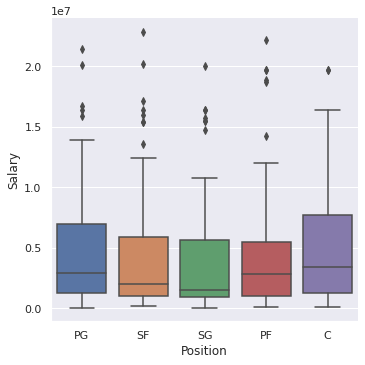

In [ ]:
sns.catplot(data =nba, x = 'Position', y ='Salary', kind = 'box');

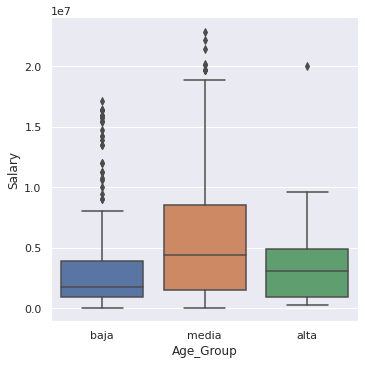

In [ ]:
sns.catplot(data =nba, x = 'Age_Group', y ='Salary', kind = 'box');

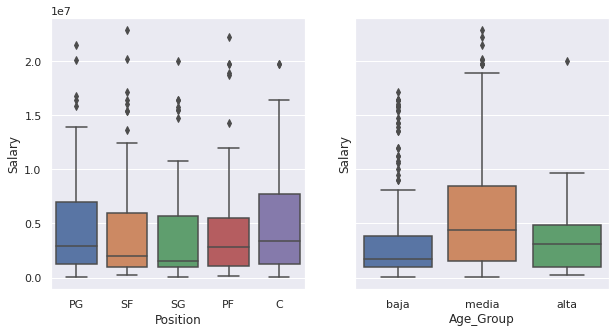

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey=True)

sns.boxplot(data =nba, x = 'Position', y ='Salary', ax= axs[0])
sns.boxplot(data =nba, x = 'Age_Group', y ='Salary', ax= axs[1]);

Los gráfico de cajas nos permiten observar:

* Distribucion
* puntos aislados
* Asimetria


* Construya una tabla dinámica que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Visualice este resultado mediante un mapa de calor.

In [ ]:
filtered_data = nba.loc[nba.Team.isin(team_salary.Team)]
filtered_data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group
77,Harrison Barnes,Golden State Warriors,40.0,SF,24.0,6-8,225.0,North Carolina,3873398.0,baja
78,Andrew Bogut,Golden State Warriors,12.0,C,31.0,7-0,260.0,Utah,13800000.0,media
79,Ian Clark,Golden State Warriors,21.0,SG,25.0,6-3,175.0,Belmont,947276.0,baja
80,Stephen Curry,Golden State Warriors,30.0,PG,28.0,6-3,190.0,Davidson,11370786.0,media
81,Festus Ezeli,Golden State Warriors,31.0,C,26.0,6-11,265.0,Vanderbilt,2008748.0,baja
...,...,...,...,...,...,...,...,...,...,...
422,Cameron Payne,Oklahoma City Thunder,22.0,PG,21.0,6-3,185.0,Murray State,2021520.0,baja
423,Andre Roberson,Oklahoma City Thunder,21.0,SG,24.0,6-7,210.0,Colorado,1210800.0,baja
424,Kyle Singler,Oklahoma City Thunder,5.0,SF,28.0,6-8,228.0,Duke,4500000.0,media
425,Dion Waiters,Oklahoma City Thunder,3.0,SG,24.0,6-4,220.0,Syracuse,5138430.0,baja


In [ ]:
table = filtered_data.pivot_table('Salary',index= "Team", columns= 'Position' )
table

Position,C,PF,PG,SF,SG
Team,,,,,
Chicago Bulls,1.340000e+07,3.578740e+06,1.117153e+07,1.958160e+06,5.717549e+06
Cleveland Cavaliers,7.768435e+06,1.394101e+07,6.551592e+06,9.472760e+05,3.349079e+06
Golden State Warriors,6.541249e+06,1.426087e+07,1.137079e+07,3.766367e+06,8.224138e+06
Los Angeles Clippers,1.039480e+07,6.655482e+06,1.228975e+07,3.662924e+06,4.639893e+06
Oklahoma City Thunder,6.303143e+06,2.606520e+06,9.382869e+06,8.599621e+06,3.207058e+06


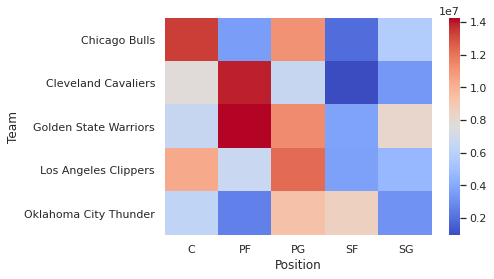

In [ ]:
sns.heatmap(table, cmap= 'coolwarm');